In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns

In [3]:
url = "https://raw.githubusercontent.com/JangirSumit/kmeans-clustering/refs/heads/master/driver-data.csv"
df = pd.read_csv(url)
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [63]:
points = pd.DataFrame({"x":df.mean_dist_day , "y": df.mean_over_speed_perc})
k = 4
centroids = points.sample(n = k , replace = False).reset_index(drop= True)
print(f"{points=} \n {centroids=}")
print(f"{points.x.dtype} , {points.y.dtype}")

points=           x   y
0      71.24  28
1      52.53  25
2      64.54  27
3      55.69  22
4      54.58  25
...      ...  ..
3995  160.04  10
3996  176.17   5
3997  170.91  12
3998  176.14   5
3999  168.03   9

[4000 rows x 2 columns] 
 centroids=        x  y
0   50.43  7
1  176.10  5
2   62.70  1
3   46.51  8
float64 , int64


In [64]:
centroids

,x,y
0,50.43,7
1,176.10,5
2,62.70,1
3,46.51,8


<Axes: xlabel='x', ylabel='y'>

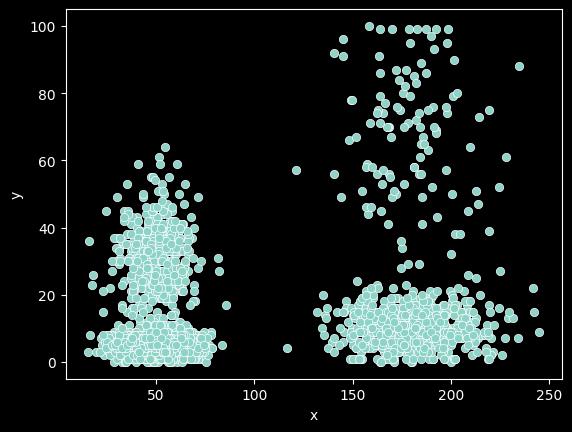

In [65]:
sns.scatterplot(points , x = 'x' , y = 'y')

In [66]:
def calcEuclid(p1 , p2):
    p1 = np.array(p1).reshape(1 , -1)
    p2 = np.array(p2).reshape(1 , -1)
    # print(f"{p1=} , {p2=}")
    return euclidean_distances(p1 , p2)[0][0]

In [28]:
def kmean(points , k , maxiter = 5):
    centroids = points.sample(n = k , replace = False).reset_index(drop= True)
    points = pd.DataFrame(points)
    # points['distance'] = float('inf')
    points['cluster'] = -1
    for iter in range(maxiter):
        for i , point in points.iterrows():
            distances = [calcEuclid((point.x , point.y) , (centroid.x , centroid.y)) for _ , centroid in centroids.iterrows()]
            cluster = np.argmin(distances)
            points.loc[i , 'cluster'] = cluster
        # print(f"{points}")
        # update centroids:
        centroids = points.groupby('cluster')[['x' , 'y']].mean()
        # print(f"{centroids=}")
    return points
# kmean(points , 4 , 5)

<Axes: xlabel='x', ylabel='y'>

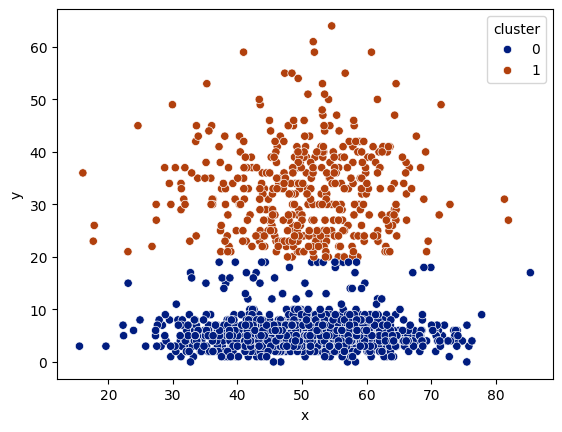

In [31]:
res = kmean(points , 2 , 10)
sns.scatterplot(res , x = 'x' , y = 'y' , hue = 'cluster' , palette = 'dark')

<Axes: xlabel='x', ylabel='y'>

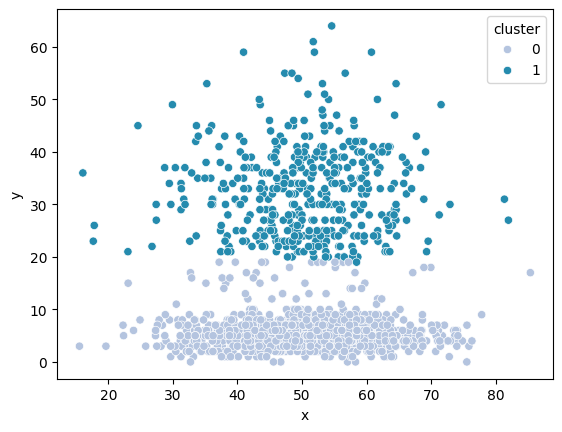

In [33]:
res = kmean(points , 2 , 10)
sns.scatterplot(res , x = 'x' , y = 'y' , hue = 'cluster' , palette = 'PuBuGn')

Best k: 4


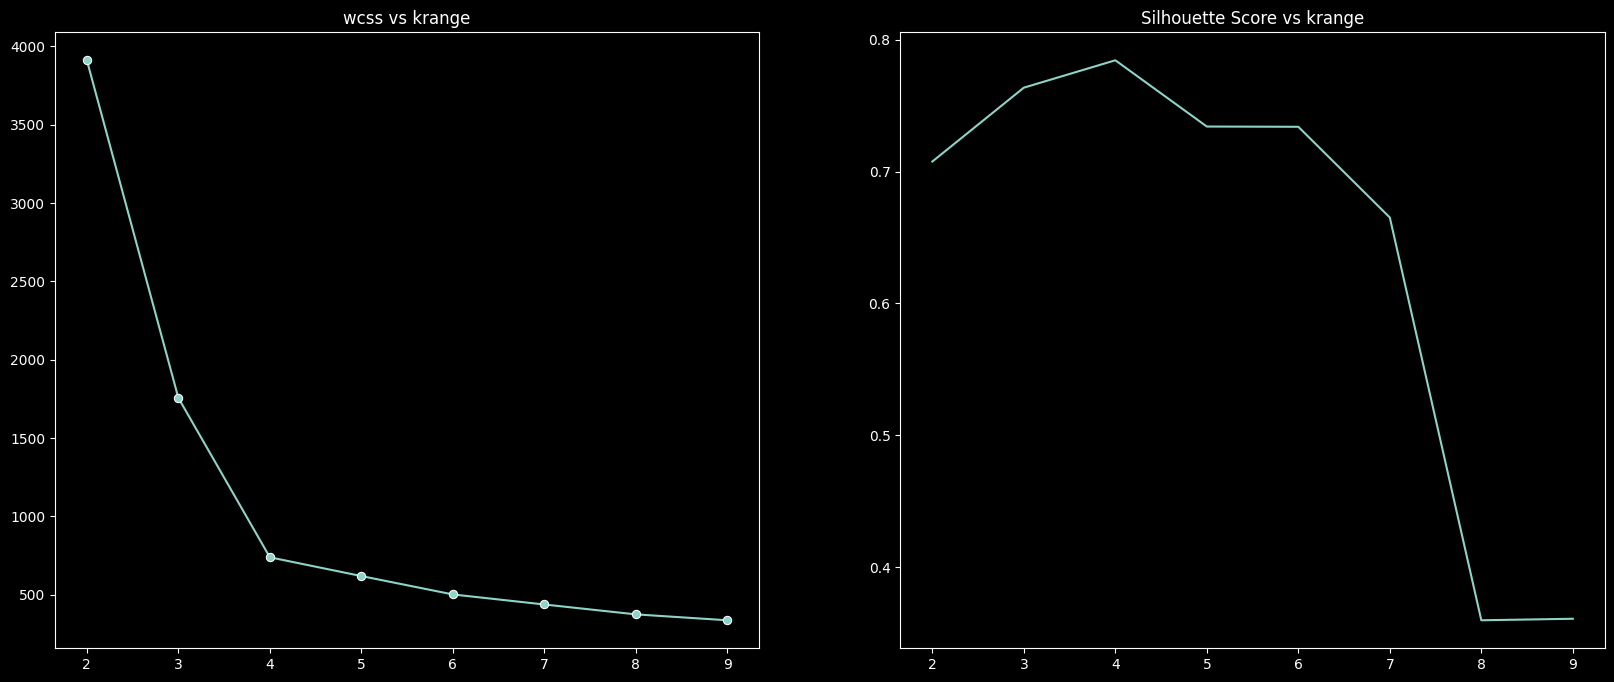

In [83]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
plt.style.use('dark_background')


scaler = StandardScaler()
xs = scaler.fit_transform(points)

wcss = []
silhouettes = []
krange = range(2 , 10)

for k in krange:
    kmean = KMeans(n_clusters=k , random_state=42 , n_init=10)
    kmean.fit(xs)
    wcss.append(kmean.inertia_)
    silhouettes.append(silhouette_score(xs, kmean.labels_))

bestk = krange[silhouettes.index(max(silhouettes))]
print(f"Best k: {bestk}")

colors = pd.cut(wcss , bins= 3 , labels = ['low' , 'medium' , 'high'])

# Elbow Method
fig = plt.figure(figsize=(20,8))

plt.subplot(1 , 2, 1)
sns.lineplot(x = krange , y = wcss , marker = "o")
plt.title('wcss vs krange')


plt.subplot(1 ,2 , 2)
sns.lineplot(x = krange , y = silhouettes)
plt.title('Silhouette Score vs krange')
plt.show()

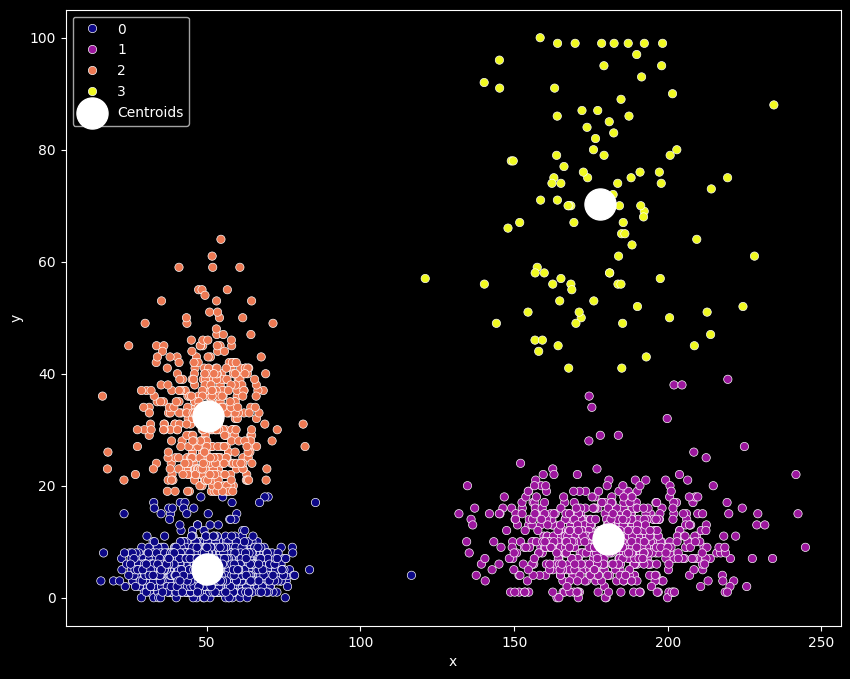

In [108]:
kmean = KMeans(n_clusters= bestk , random_state= 42 , n_init= 10)
clusters = kmean.fit_predict(xs)

clusterCenters = scaler.inverse_transform(kmean.cluster_centers_)
plt.figure(figsize = (10,8))
sns.scatterplot(data = points , x= 'x' , y = 'y' , hue = clusters , palette = 'plasma')
plt.scatter(x = clusterCenters[:, 0] , y = clusterCenters[: , 1] , color = 'white' , marker = 'o' ,s = 500 , label = 'Centroids')
plt.legend()
plt.show()

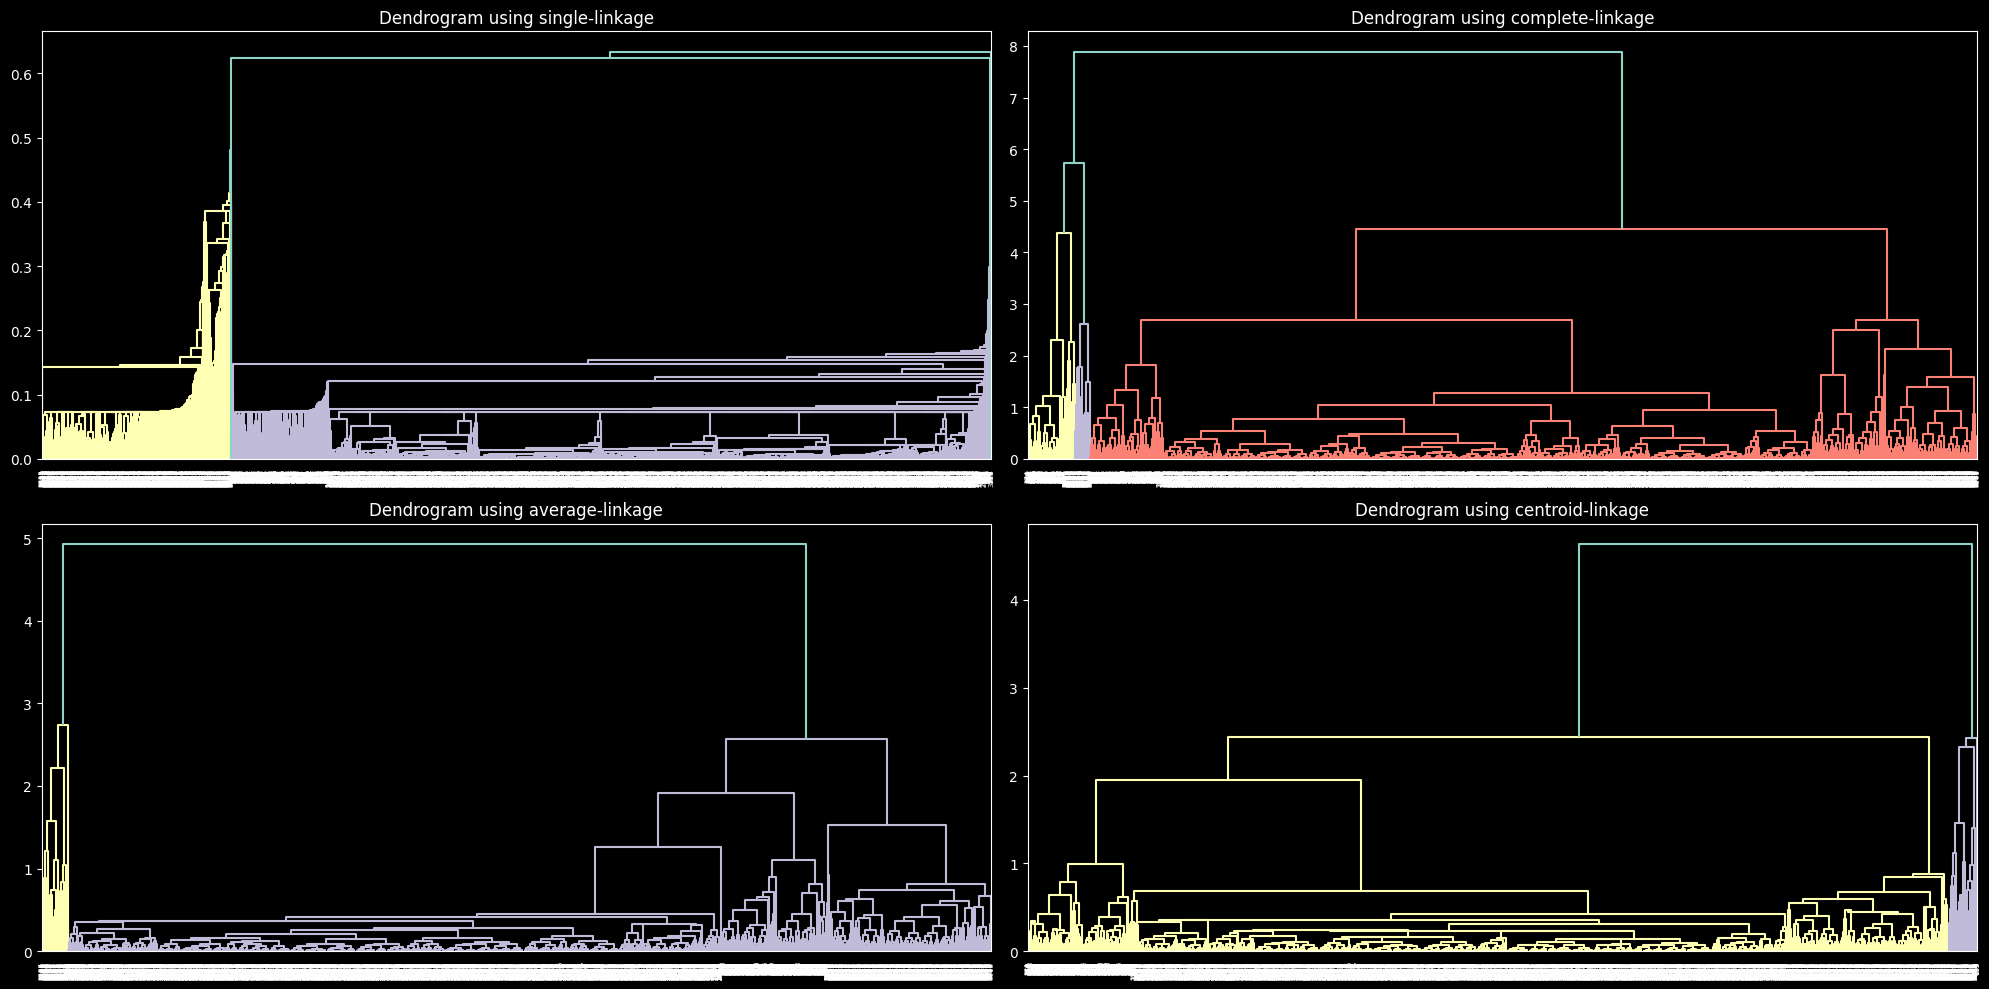

In [106]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as sch


# Linkage methods to analyze
linkage_methods = ['single', 'complete', 'average', 'centroid']

# Plotting dendrograms
plt.figure(figsize=(20, 10))
for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i + 1)
    #linked = linkage(X_scaled[:100], method=method) #Took only subset of data
    linked = linkage(xs, method=method) #Took only subset of data
    dendrogram(linked,
               orientation='top',
               distance_sort='descending',
               show_leaf_counts=True)
    plt.title(f'Dendrogram using {method}-linkage')
plt.tight_layout()
plt.show()



## Clusturing on text data:


In [124]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

analyzer = SentimentIntensityAnalyzer()

df = pd.read_csv('./data/trainTweets.csv' ,header = None , names = ['id' , 'sentiment' , 'tweet'] , encoding= 'latin1')
df = df.iloc[1:]
df

,id,sentiment,tweet
1,1,0,"@RailMinIndia My PNR is 8348062961, I am in wa..."
2,2,0,@sureshpprabhu @RailMinIndia AC not working in...
3,3,0,@RailMinIndia I'm traveling to chennai by trai...
4,4,5,@RailMinIndia irctc is not responding at the t...
5,5,7,@DRMbhopal @RailMinIndia @sanjaygupta2012 @drm...
...,...,...,...
1362,1362,5,@RailMinIndia An aged lady has been alloted up...
1363,1363,1,"aggressive copassengers, need of immediate cha..."
1364,1364,0,@RailMinIndia no water in coach...please do so...
1365,1365,3,@RailMinIndia @sureshpprabhu While travelling ...


In [127]:
tweets = df['tweet']
ts = []
for tweet in tweets:
    ps = analyzer.polarity_scores(tweet)
    ts.append({
        "tweet":tweet,
        "compound":ps['compound']
    })

tdf = pd.DataFrame(ts)
tdf.head()

,tweet,compound
0,"@RailMinIndia My PNR is 8348062961, I am in wa...",-0.4767
1,@sureshpprabhu @RailMinIndia AC not working in...,-0.2235
2,@RailMinIndia I'm traveling to chennai by trai...,0.0000
3,@RailMinIndia irctc is not responding at the t...,0.0000
4,@DRMbhopal @RailMinIndia @sanjaygupta2012 @drm...,0.0258


In [129]:
sentiment = []
for score in tdf['compound']:
    if score > 0:
        sentiment.append('positive')
    elif score < 0:
        sentiment.append('negative')
    else:
        sentiment.append('neutral')
tdf['sentiment'] = sentiment
tdf.head()

,tweet,compound,sentiment
0,"@RailMinIndia My PNR is 8348062961, I am in wa...",-0.4767,negative
1,@sureshpprabhu @RailMinIndia AC not working in...,-0.2235,negative
2,@RailMinIndia I'm traveling to chennai by trai...,0.0000,neutral
3,@RailMinIndia irctc is not responding at the t...,0.0000,neutral
4,@DRMbhopal @RailMinIndia @sanjaygupta2012 @drm...,0.0258,positive


In [132]:
import nltk
nltk.download(['punkt' , 'stopwords' , 'punkt_tab'])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sanketmishra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sanketmishra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sanketmishra/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [170]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import re
# Text preprocessing
stop_words = stopwords.words('english')
processed_tweets = []

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and URLs
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'https?://\S+', '', text)  # Remove URLs

    # Tokenize text
    tokens = word_tokenize(text)

    # Filter out stopwords
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Join tokens back into string
    return ' '.join(filtered_tokens).strip()

# Process all tweets
for tweet in tweets:
    processed_tweets.append(preprocess_text(tweet))

# Feature extraction using Count Vectorizer
vectorizer = CountVectorizer(binary=False, min_df=2, ngram_range=(1, 2))
cv_result = vectorizer.fit_transform(processed_tweets)

# Display feature matrix dimensions
print("\nFeature Extraction Results:")
print(f"Dimension after Count Vectorizer: {cv_result.shape}")


Feature Extraction Results:
Dimension after Count Vectorizer: (1366, 3346)


<Axes: >

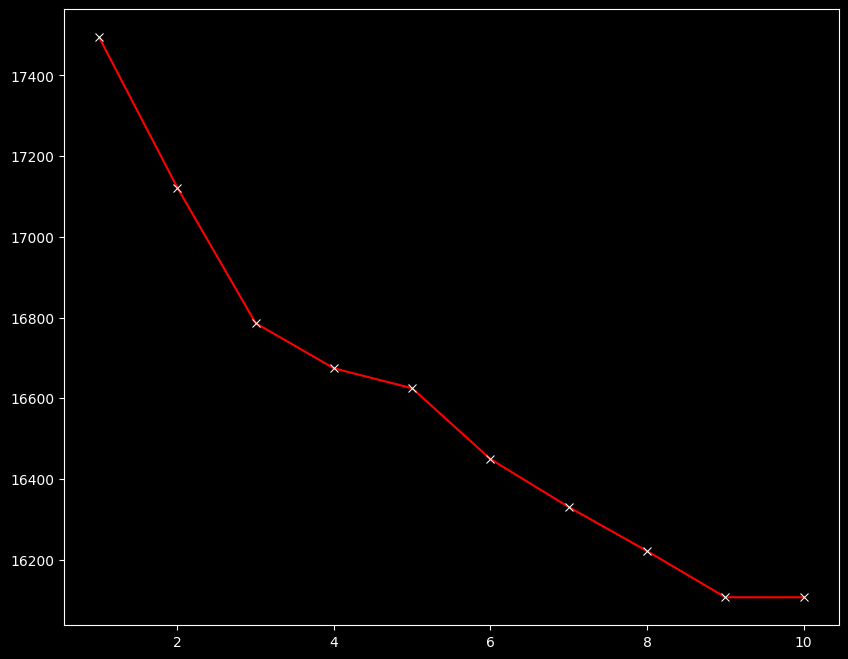

In [171]:
# perform elbow method to get the best k value:

x = cv_result
wcss = []
silhouettes = []
krange = range(1 , 11)

for k in krange:
    kmean = KMeans(n_clusters= k , random_state= 42 , n_init= 10)
    kmean.fit(x)
    wcss.append(kmean.inertia_)
    # silhouettes.append(silhouette_score(x , kmean.labels_))

fig = plt.figure(figsize = (10 , 8))
sns.lineplot(x = krange , y = wcss , marker = 'x' , color = 'red')

In [172]:
from collections import Counter
k = 4
kmean = KMeans(n_clusters= k , random_state= 42)
clusters = kmean.fit_predict(x)
tdf['cluster'] = clusters

print(f"{Counter(clusters)}")

for i in range(k):
    print(f"Tweets belonging to cluster: {i}")
    ctweets = tdf[tdf['cluster'] == i]['tweet'].sample(n = min(5 , (tdf['cluster'] == i).sum()), replace = False)
    for tweet in ctweets:
        print(tweet)
    print("*"*400)

Counter({2: 1166, 3: 183, 1: 15, 0: 2})
Tweets belonging to cluster: 0
@RailMinIndia 15 tatkal agents are in front of me at nagpur railway station. Vo kisi aur ke naam pe ticket nikal rahe hai. Plz help
@sureshpprabhu @RailMinIndia New bongaigaon,assam railway station clean railway station https://t.co/gkEE02U6CS
****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
Tweets belonging to cluster: 1
@RailMinIndia Sir today i have gone to Palam Ticket Counter and ask for 3 ticket on different date they told me 1 ticket is issued for one
@RailMinIndia @PiyushGoyal If a person buys ticket online and if its not confirmed then why that ticket is not a v

2